# Models training on MNIST dataset (handwritten digits)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

In [2]:
test_accuracy = {}

## CNN (Convolutional Neural Network) via TensorFlow (Keras)

In [3]:
from tensorflow.keras.datasets import mnist        
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])


model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32, epochs=3, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

(60000, 28, 28, 1)
Epoch 1/3
1500/1500 [==============================] - 18s 11ms/step - loss: 0.1492 - accuracy: 0.9542 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 2/3
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9894


[0.030651265755295753, 0.9894000291824341]

In [4]:
test_accuracy['cnn'] = model.evaluate(x_test, y_test_cat)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9894


In [5]:
model.save('mnist_cnn.h5')

In [137]:
x_train.shape

(60000, 28, 28, 1)

In [138]:
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 1s 4ms/step


array([[2.6199409e-08, 9.4079729e-07, 1.2207387e-06, ..., 9.9999249e-01,
        8.3211226e-08, 2.2200552e-06],
       [1.5434561e-06, 2.0806385e-06, 9.9999559e-01, ..., 7.1545103e-10,
        5.7583090e-08, 1.4909830e-09],
       [6.3828238e-06, 9.9982905e-01, 4.7385398e-05, ..., 2.4964944e-05,
        2.0864403e-05, 4.6340756e-07],
       ...,
       [1.6228647e-11, 7.7580843e-08, 2.6686822e-09, ..., 1.4291185e-09,
        1.8902444e-06, 2.7691362e-06],
       [9.6686490e-09, 5.5115712e-10, 1.1386684e-10, ..., 1.7249926e-10,
        4.0129955e-05, 1.6659850e-08],
       [8.6476035e-07, 3.1111396e-09, 1.6707128e-06, ..., 2.9714529e-12,
        3.0053407e-05, 8.1345291e-08]], dtype=float32)

In [139]:
predictions.shape

(10000, 10)

In [140]:
predictions[0]

array([2.6199409e-08, 9.4079729e-07, 1.2207387e-06, 3.1486013e-06,
       1.0289678e-09, 4.1637588e-08, 1.1392399e-12, 9.9999249e-01,
       8.3211226e-08, 2.2200552e-06], dtype=float32)

In [142]:
y_pred = np.argmax(predictions, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [143]:
y_pred.shape

(10000,)

In [144]:
y_test.shape

(10000,)

In [145]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9882

In [146]:
(y_test != y_pred).sum()

118

In [147]:
wrong_digits_idx = np.arange(y_test.shape[0])[y_test != y_pred]
wrong_digits_idx

array([  18,  151,  241,  247,  448,  449,  479,  659,  684,  717,  726,
        740,  846,  883,  938,  947, 1014, 1039, 1112, 1166, 1182, 1206,
       1226, 1242, 1247, 1260, 1290, 1319, 1326, 1383, 1522, 1527, 1530,
       1553, 1621, 1709, 1898, 2035, 2053, 2070, 2129, 2130, 2266, 2280,
       2293, 2329, 2387, 2447, 2578, 2607, 2654, 2894, 2896, 2921, 2939,
       2953, 2995, 3073, 3225, 3503, 3520, 3534, 3597, 3751, 3767, 3808,
       3850, 3926, 4027, 4176, 4199, 4238, 4265, 4443, 4497, 4500, 4507,
       4740, 4761, 4837, 4860, 4880, 5246, 5450, 5600, 5623, 5955, 5973,
       6011, 6091, 6173, 6555, 6576, 6597, 6625, 6651, 6662, 6755, 6783,
       7216, 7432, 7565, 7902, 8095, 8128, 8316, 8325, 8408, 9009, 9015,
       9019, 9024, 9642, 9679, 9692, 9729, 9792, 9850])

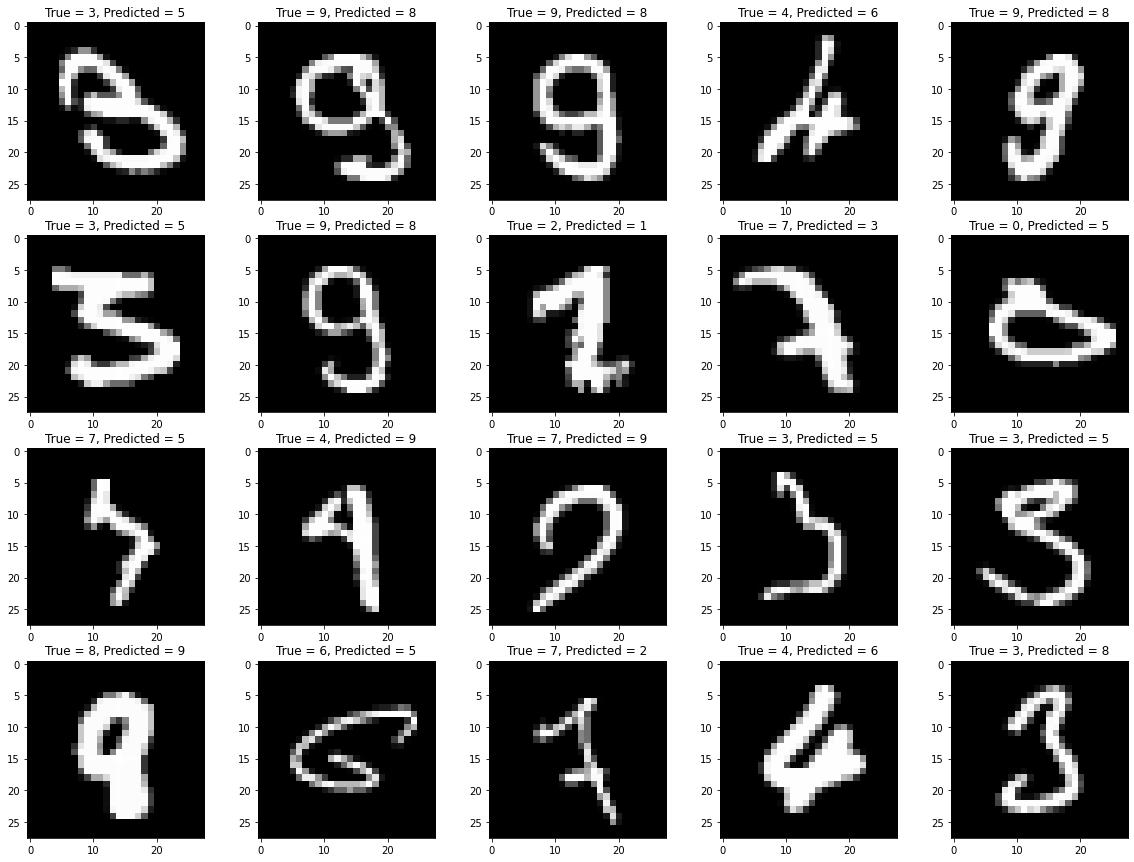

In [148]:
fig, ax = plt.subplots(4, 5, figsize=(20, 15))
ax = ax.ravel()
i = 0
for idx in wrong_digits_idx[:20]:
    ax[i].imshow(x_test[idx], cmap='gray')
    ax[i].set_title(f'True = {y_test[idx]}, Predicted = {y_pred[idx]}')
    i += 1
plt.show()

## "Simple" ML algorithms

In [6]:
sklearn_models = {}

### Logistic Regression

In [230]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train_reshaped = x_train.reshape(60000, 28*28)
x_test_reshaped = x_test.reshape(10000, 28*28)

In [231]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_reshaped, y_train)

LogisticRegression(max_iter=1000)

In [232]:
log_reg.score(x_train_reshaped, y_train)

0.9392666666666667

In [233]:
log_reg.score(x_test_reshaped, y_test)

0.9256

In [234]:
test_accuracy['logistic_regression'] = log_reg.score(x_test_reshaped, y_test)

In [235]:
sklearn_models['logistic_regression'] = log_reg

### Dimensionality reduction

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
pca.fit(x_train_reshaped)

PCA(n_components=25)

In [15]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482952, 0.01324556, 0.01276893, 0.01187258, 0.01152677,
       0.01066125, 0.01006644, 0.0095355 , 0.00912328, 0.00882079])

In [236]:
pca.explained_variance_ratio_.sum()

0.6917879390666177

In [237]:
log_reg_pca = LogisticRegression(max_iter=1000)

In [238]:
log_reg_pca.fit(pca.transform(x_train_reshaped), y_train)

LogisticRegression(max_iter=1000)

In [239]:
log_reg_pca.score(pca.transform(x_train_reshaped), y_train)

0.8866666666666667

In [240]:
log_reg_pca.score(pca.transform(x_test_reshaped), y_test)

0.8913

In [241]:
test_accuracy['logistic_regression_pca'] = log_reg_pca.score(pca.transform(x_test_reshaped), y_test)

In [242]:
sklearn_models['logistic_regression_pca'] = log_reg_pca
sklearn_models['pca'] = pca

### XGBoost

In [22]:
from xgboost import XGBClassifier

clf = XGBClassifier()

#### On initial dataset

In [23]:
clf.fit(x_train_reshaped, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [24]:
clf.score(x_train_reshaped, y_train)

1.0

In [25]:
clf.score(x_test_reshaped, y_test)

0.978

In [26]:
test_accuracy['xgboost'] = clf.score(x_test_reshaped, y_test)

In [27]:
clf.save_model('mnist_xgboost.json')

#### On transformed dataset (after PCA)

In [28]:
clf.fit(pca.transform(x_train_reshaped), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [29]:
clf.score(pca.transform(x_train_reshaped), y_train)

0.9999833333333333

In [30]:
clf.score(pca.transform(x_test_reshaped), y_test)

0.9627

In [31]:
test_accuracy['xgboost_pca'] = clf.score(pca.transform(x_test_reshaped), y_test)

In [32]:
clf.save_model('mnist_xgboost_pca.json')

In [243]:
joblib.dump(test_accuracy, 'test_accuracy.joblib')

['test_accuracy.joblib']

In [244]:
joblib.dump(sklearn_models, 'sklearn_models.joblib')

['sklearn_models.joblib']

## Deconvolutional Neural Network (DNN)

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist        
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, Reshape, LeakyReLU

print( x_train.shape )

model = keras.Sequential([
    Dense(7*7*128, activation='relu', input_shape=(None, 1)),
    Reshape((7, 7, 128)),
    Conv2DTranspose(256, (3,3), 
                    strides=(1, 1), padding='same', 
                    activation='relu', use_bias=False),
    Conv2DTranspose(128, (3,3), 
                    strides=(1, 1), padding='same', 
                    activation='relu', use_bias=False),
    Conv2DTranspose(64, (3,3), 
                    strides=(1, 1), padding='same', 
                    activation='relu', use_bias=False),
    Conv2DTranspose(32, (3,3), 
                    strides=(2, 2), padding='same', 
                    activation='relu', use_bias=False),
    Conv2DTranspose(1, (3,3), 
                    strides=(2, 2), padding='same', 
                    activation='relu', use_bias=False,
                    activity_regularizer=keras.regularizers.L1(l1=0.00015))
])


model.compile(optimizer='adam',
             loss=keras.losses.LogCosh(), # LogCosh, MeanAbsoluteError, MeanSquaredError
             metrics=['mae'])


his = model.fit(np.expand_dims(y_train, axis=1), x_train, batch_size=32, epochs=3, validation_split=0.2)

(60000, 28, 28, 1)
Epoch 1/3
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0396 - mae: 0.1158 - val_loss: 0.0371 - val_mae: 0.1090
Epoch 2/3
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0375 - mae: 0.1097 - val_loss: 0.0369 - val_mae: 0.1080
Epoch 3/3
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0374 - mae: 0.1094 - val_loss: 0.0368 - val_mae: 0.1084


In [212]:
model.evaluate(np.expand_dims(y_test, axis=1), x_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0375 - mae: 0.1099


[0.03745098039507866, 0.10991491377353668]

1/1 [==============================] - 0s 22ms/step


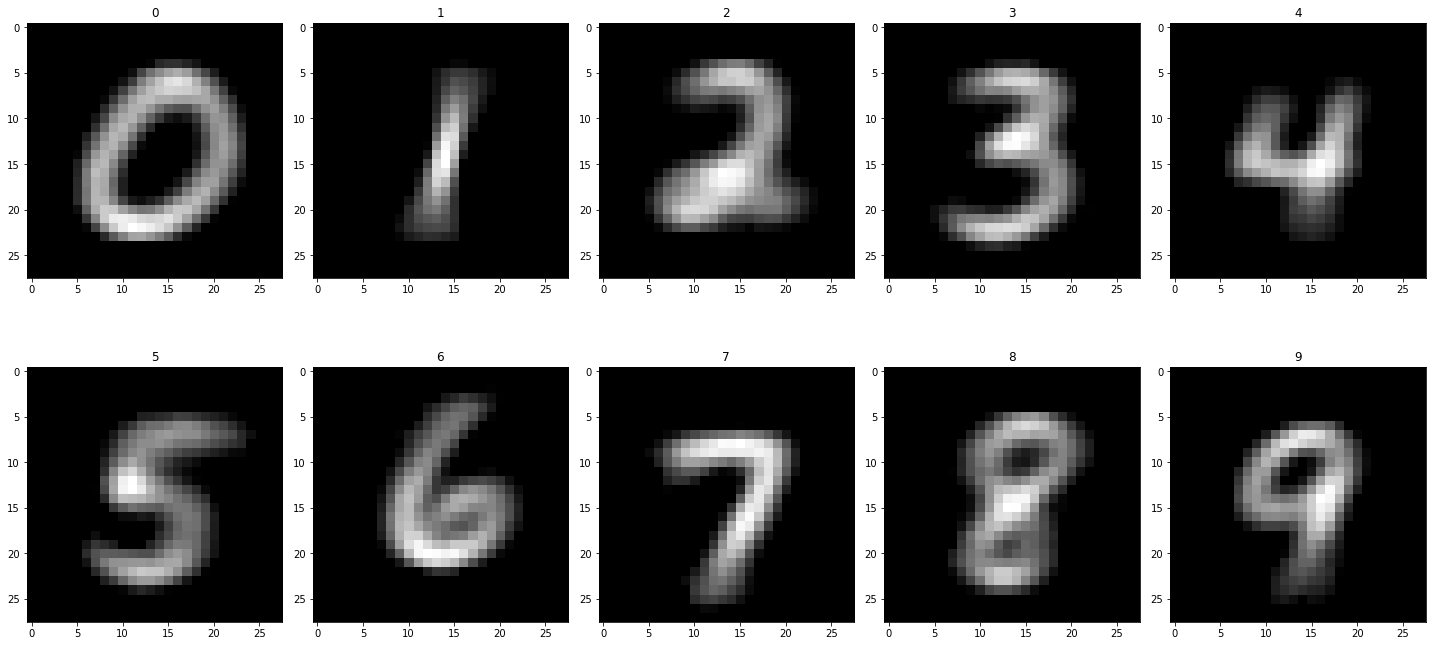

In [213]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i in range(10):
    ax[i].imshow(model.predict([[i]])[0], cmap='gray')
    ax[i].set_title(i)
plt.tight_layout()

In [214]:
model.save('mnist_dnn.h5')